In [2]:
import tensorflow as tf
import matplotlib as plt

In [3]:
#now we load and split our dataset...NB: we will be using another keras dataset so here we go
ds =  tf.keras.datasets.cifar10
(training_imgs, training_lbls), (testing_imgs, testing_lbls) =ds.load_data()

#normalize pixel vals to be btn 0 and 1
training_imgs, testing_imgs = training_imgs/255.0, testing_imgs/255.0

class_names = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#CNN ARCHITECTURE

ourmodel = tf.keras.models.Sequential()
ourmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (32,32,3) ))
ourmodel.add(tf.keras.layers.MaxPooling2D( (2,2) )) #pooling sample size of 2 by 2 with a stride of 2
#conv2d(num of filters, sample (filter) size,  activation fxn(apres dot product),input spape is what we expect from this 
#ayer(feature map

#dude claims we needn't do this cos based on the lines above
ourmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
ourmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
ourmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

In [5]:
ourmodel.summary()  #check out our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

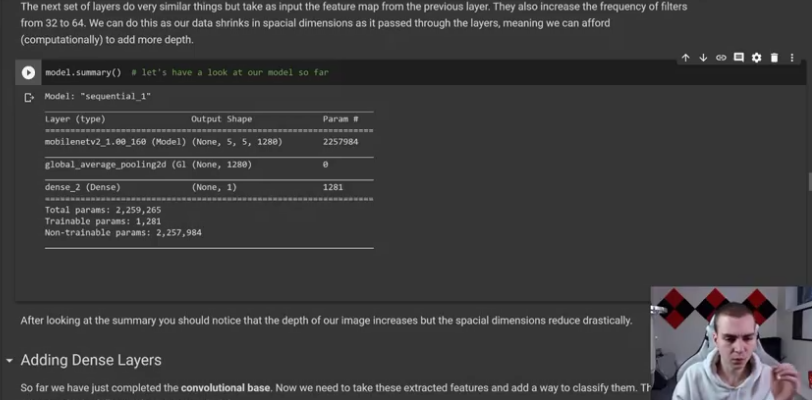 

so our first conv layer returned a 30 by 30 instead of a 32 by 32 as this is the num of samples we can take sans padding.  Pooling this output by a 2by 2 matrix with two strands, it shrinks the output shape of the convolutional layer by a factor of 2; and this shrunk size is nowpassed to our next conv layer. this loop repeats itself based on the number of convolutional and pooling layers in our CNN architecture..

## Adding Dense Layers
with the shrunk size derived, we will pass our shit to a dense layer to look for the shrunk object in our img object. remember dense layers look for pixels in specifice positions. so our shrunk object to the dense layer has positions and features memorized and together, they will be sought in our image. 

In [8]:
ourmodel.add(tf.keras.layers.Flatten()) #convert grid px output of 4 by 4 by 64 to array px of len = 4*4*64
ourmodel.add(tf.keras.layers.Dense(64, activation = 'relu')) #create DNN wf 64 neurons/nodes to connect our array inputs
ourmodel.add(tf.keras.layers.Dense(10)) #we hv 10 class names through which we feed our output vals.

In [9]:
ourmodel.summary()
#notice how the flatten method changes the shape of our array 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
#now we start training and compiling our model with teh recommended hyperparams from tf...this makes cnn longer than usual
ourmodel.compile(optimizer = 'adam', 
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])


hisory = ourmodel.fit(training_imgs, training_lbls, epochs = 4,
                     validation_data = (testing_imgs, testing_lbls))

Epoch 1/4
1563/1563 [==============================] - 172s 107ms/step - loss: 1.5154 - accuracy: 0.4462 - val_loss: 1.2492 - val_accuracy: 0.5571
Epoch 2/4
1563/1563 [==============================] - 174s 112ms/step - loss: 1.1559 - accuracy: 0.5915 - val_loss: 1.0644 - val_accuracy: 0.6284
Epoch 3/4
1563/1563 [==============================] - 165s 106ms/step - loss: 1.0039 - accuracy: 0.6479 - val_loss: 0.9858 - val_accuracy: 0.6552
Epoch 4/4
1563/1563 [==============================] - 184s 118ms/step - loss: 0.9056 - accuracy: 0.6837 - val_loss: 0.9238 - val_accuracy: 0.6805


In [14]:
# Evaluating the model
# We can tell how well the model perfored by lookaing at its perfrmance on the test data set
test_loss, test_acc = ourmodel.evaluate(testing_imgs, testing_lbls, verbose = 2)
print(test_acc, '\n', test_loss)
#verbose here is 2 cos we are returning 2 metadata of the evaluate output
#accuracy should be same as that of the last epoch during training

313/313 - 13s - loss: 0.9238 - accuracy: 0.6805 - 13s/epoch - 41ms/step
0.6804999709129333 
 0.9237802624702454


 ## Predictions
 We are going to try this later on...

In [41]:

predictions = ourmodel.predict(testing_imgs)
print(predictions, '\n')
print(type(predictions))
predictions.shape  #tells us we have 10,000 test data



313/313 [==============================] - 11s 35ms/step
[[-1.6968395e+00 -4.4025917e+00  1.6954914e-03 ... -1.8800621e+00
  -2.7877080e+00 -3.1205728e+00]
 [ 3.7937496e+00  3.1813538e+00 -2.1784616e+00 ... -3.6220379e+00
   4.4346347e+00 -1.9904467e-01]
 [ 1.1645285e+00  1.0145440e+00 -1.5040331e+00 ... -1.9194794e+00
   1.7426733e+00  5.2438062e-01]
 ...
 [-4.8672996e+00 -6.7385783e+00  1.7527487e+00 ...  1.5441582e+00
  -4.3967338e+00 -3.7987471e+00]
 [ 7.4098653e-01  5.4803753e-01 -1.1469086e+00 ... -9.3956131e-01
  -3.4647994e+00 -2.6035309e+00]
 [-1.0882968e+00 -6.1900840e+00 -1.1465932e+00 ...  1.1123653e+01
  -5.6349826e+00 -3.3054128e+00]] 

<class 'numpy.ndarray'>


(10000, 10)

bird


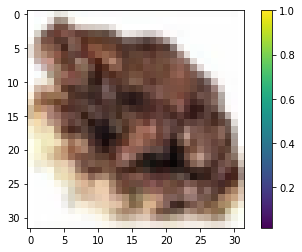

In [42]:
lottonum = 125                 #chang this val to test pc prediction
print(class_names[np.argmax(predictions[lottonum])]) #gets to print class name of obj predicted by model.

#check corresponding image in our test dataset for marking
plt.figure()
plt.imshow(training_imgs[lottonum])
plt.colorbar()
plt.grid(False)
plt.show()

#Ten  predictions...none right.

# Working with Small Datasets

Now we see that our accuracy is less than 70, and it was the same for tim as well, ours beat his by one. In CNN, to have a high  amount of accuracy requires large voluminous data as compared to our 50,000 rows here. For this reason, dude is going to tell us how to deal with our data in case it’s a few 1000 lines and shit laidat.

### Data Augmentation
as name suggests, we modify our data before it is fed to the model. so for our images, we could flip horizontally, vertically, crop, stretch, rotate and do all sorts of things to our dataset instances. so if we have say 10,000 imgs, doing all that could yield 4 or more times the amount.

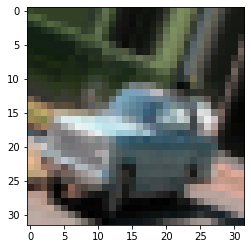

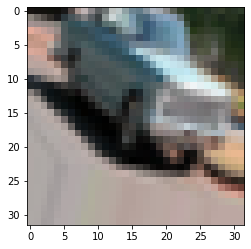

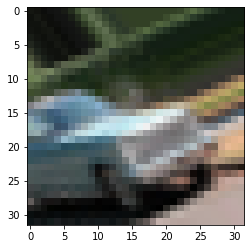

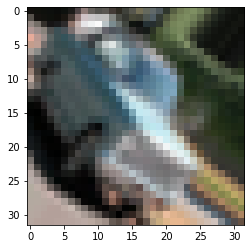

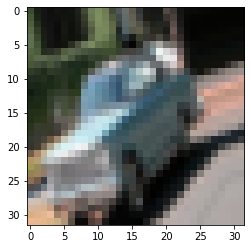

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #class for img data augmentation
import matplotlib.pyplot as plt

#Creates a data generator object that transforms images
datagon = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2, 
        height_shift_range = 0.2, 
        shear_range = 0.2, 
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
)

#pick an image to transform
test_img = training_imgs[32]
img = image.img_to_array(test_img) #converts img to a np array
img = img.reshape( (1,) + img.shape) #reshape img, just one value in our tuple arg cos the emaindare is inferred

i = 0

for batch in datagon.flow(img, save_prefix = 'test', save_format='jpeg'): #infinite loop for saving imgs till 'break'
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i > 4 :    #run 4 laps then exit loop
        break

plt.show()

### Pretrained Models

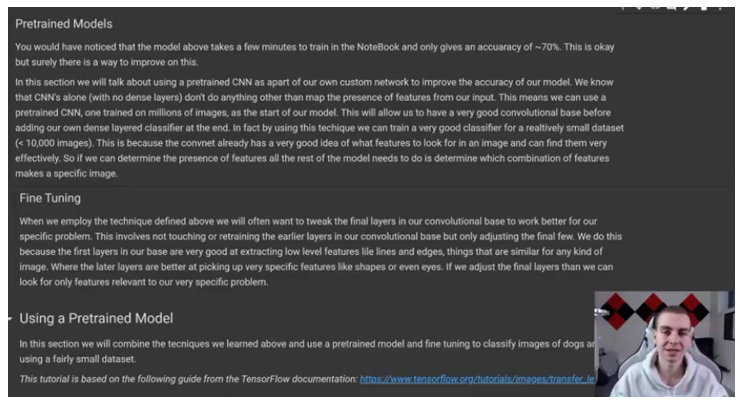

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras #new mode of import

In [ ]:
#load the cats_vs_dogs dataset from the tensorflow_datasets; contains(img,lbl) pairs wf img hvn diff dims & 3 color channels

import tensorflow_datasets as tfds  #requires a pip install...
tfds.disable_progress_bar()

#split the data manually into 80% training, 10% testing  and 10% validation
(dstrain, dsvalidation, dstest), metadata = tfds.load(           #requires internet to load tho
    'cats_vs_dogs', 
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True,    
)


In [ ]:
get_lbl_name = metadata.features['label'].int2str  #creates a fxn object that we can use to get labels

#display 2 imgs from the dataset
for image, label in dstrain.take(9): display 9 images from our training ds
    plt.figure()
    plt.imshow(image) 
    plt.title(get_lbl_name)

#### Data Preprocessing
so we have our images all being different dimensions, and for that we are going to resize them all to 160x160. the choice of shrinking instead of enlargement is that the former does better as detail is rarely loss as compared to teh latter. 
We will first need to create a function and then apply that fxn to all our imgs thereafter using the map method

In [ ]:
IMG_SIZE = 160
def format_example(img, lbl):
    #returns an img that it reshapes to img_size = 160
    image = tf.cast(img, tf.float32) #converts grid of px values to 32 bit float vals
    image = (image/127.5)-1        #instead of 255 to normalize vals btn 0-1; we normalize btn 0 and 2...then subtract 1
    image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE)) #we then resize wf the resize method...passn img obj, width, height
    return image,label

In [ ]:
#now apply fxn with map() whic takes all img objs in img dataset adn applies fxn passed to it as a param to all imgs in ds
train =  dstrain.map(format_example)
validation = dsvalidation(format_example)
test = dstest.map(format_example)

In [ ]:
#display samples of reshaped imgs
for img, lbl in train.take(9):
    plt.figure()
    plt.imshow(img)
    plt.ylabel(lbl)
    plt.title(get_label_name(lbl))

In [ ]:
#compare begining shape vs resized shape

for img,lbl in dstrain.take(2):
    print('Original Shape:', img.shape)
    
for img,lbl in train.take(2):
    print('Resized shape:', img.shape)

### Using a Pretrained Model
The Model we'll use as teh convolutional base is the MobileNetV2 developed by Google. This model is trained on 1.4 million images adn has 1000 different classes of everyday objects. We want to use it but only its convolutional base, so when loading the model, we will specify dt we dnt want to load the top (classification)layer. We'll tell the model what input shape to expect adn to use the predetermined weights from imagenet(Google's Dataset)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

#CREATE THE BASE MODEL FROM THE PRE TRAINED MODEL MOBILENET V2
mybasemodel = tf.keras.applications.MobileNetV2( input_shape = IMG_SIZE, 
                                                 include_top = False, #this forgoes the 10000 classes of Googles model
                                                 weights = 'imagenet')

In [ ]:
mybasemodel.summary()
#remember we are only using this for the base generalization, like a stepping stone in our own conv model

At this point, the mybasemodel simply outputs a shape of (32,5,5,1280) tesor dt is a feature extraction from our original (1,160,160,3) image. The 32 means we have got 32 layers of diff features/filters.

In [ ]:
for img, _ in train_batches.take(1): #dunno the purpose of this
    pass

feature_batch = mybasemodel(mage)
print(feature_batch.shape)

### Freezing the Base
The term freezing refers to disabling the training property of a layer. It simply means we wont make any changes to teh weights of any layers that are frozen during training. This is important as we dont want to change teh convolutional base that already has learned weights.

In [ ]:
mybasemodel.trainable = False
mybasemodel.summary()

### Adding our Classifier
Now we hv a base layer setup we can add the classifier. instead of flattening the feature map of the base layer, we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to use a single 1280 vector per filter

In [ ]:
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()

##### Finally we will add our prediction layer that will be a single dense neuron. We can do this cos we have two classes to predict for

In [ ]:
prediction_layer = keras.layers.Dense(1) #cos we choosing btn cat and dog

In [ ]:
mymodel = tf.keras.Sequential([
    base_model, 
    global_avg_layer,
    prediction_layer
])

In [ ]:
mymodel.summary() #should give a  breakdown of our layers


### Training the Model
this will be done with a small learning rete to ensure thate the base model does not have any major changes applied to it. Also the summary earlier sums up a total number of 2,259,206 params and just 1,281 of them trainable. this is cos our base model has already been trained adn we dont want to alter it in any sense.

so we will be learning mainly on our additional 2 layer, global and dense

In [ ]:
base_learning_rate = 0.0001  #value by which we modify weights and biases
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
             loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), #Binary CE is used cos of our 2 output classes
              metrics = ['accuracy']
             )

In [ ]:
#we can evaluate our model right now to see how it does before training it on our new images
initial_epoch = 3
validation_steps = 20

losszero, accuracyzero = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
# Now we can train it on our images -- takes over an hour to train according to tim
history = ourmodel.fit(train_batches,
                       epochs = initial_epochs,
                      validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

## Saving and Loading models in keras

In [ ]:
ourmodel.save('Dogs_vs_Cats.h5') the dot h5 is #the extension for saving datasets in keras
newmodel = tf.keras.models.load_model('Dogs_vs_Cats.h5')

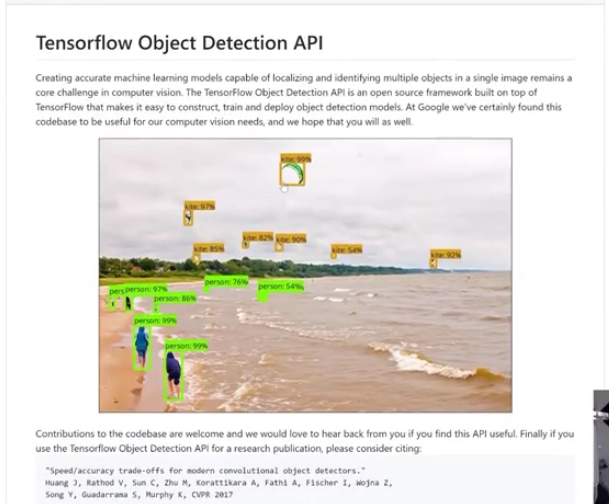
### Look much into it